In [252]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from dateutil import parser
from collections import Counter

#see all the columns
pd.set_option('display.max_columns', 500)

In [253]:
cov19_cases = pd.read_csv("COVID19_line_list_data.csv")
# print(cov19_cases['symptom'].unique())
cov19_cases.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
cov19_cases['symptom'].fillna('',inplace=True)

In [255]:
# programmatically convert symptoms to binary columns
set_of_symptoms = []
for symptoms in cov19_cases['symptom']:
    symptom_list = symptoms.split(',')
    for symptom in symptom_list:
        set_of_symptoms.append(symptom.strip())
# print(len(set_of_symptoms))
print(Counter(set_of_symptoms))
Counter
set_of_symptoms = set(set_of_symptoms)

Counter({'': 815, 'fever': 200, 'cough': 114, 'malaise': 28, 'sore throat': 28, 'headache': 15, 'chills': 13, 'runny nose': 11, 'fatigue': 11, 'diarrhea': 10, 'sputum': 10, 'joint pain': 9, 'shortness of breath': 9, 'vomiting': 6, 'muscle pain': 4, 'dyspnea': 4, 'throat discomfort': 4, 'pneumonia': 3, 'difficulty breathing': 3, 'feaver': 2, 'difficult in breathing': 2, 'throat pain': 2, 'cold': 2, 'loss of appetite': 2, 'breathlessness': 2, 'nausea': 2, 'chest pain': 2, 'high fever': 2, 'muscle aches': 2, 'myalgia': 2, 'abdominal pain': 1, 'nasal discharge': 1, 'respiratory distress': 1, 'mild cough': 1, 'sneeze': 1, 'heavy head': 1, 'thirst': 1, 'flu': 1, 'mild fever': 1, 'muscle cramps': 1, 'aching muscles': 1, 'sore body': 1, 'chest discomfort': 1, 'chill': 1, 'flu symptoms': 1, 'reflux': 1, 'physical discomfort': 1, 'itchy throat': 1, 'coughing': 1, 'tired': 1, 'myalgias': 1, 'feve\\': 1, 'cough with sputum': 1})


In [256]:
dict_of_symptoms = {
    'fever': ['fever','feaver', 'feve\\', 'high fever', 'mid fever'], 
    'cough': ['coughing', 'cough', 'mild cough'],
    'something_else': []
}

In [257]:
for symptom in set_of_symptoms: 
    if not (symptom == '' or symptom in dict_of_symptoms['fever'] or symptom in dict_of_symptoms['cough'] ):
        dict_of_symptoms['something_else'].append(symptom)

In [258]:
print(dict_of_symptoms)

{'fever': ['fever', 'feaver', 'feve\\', 'high fever', 'mid fever'], 'cough': ['coughing', 'cough', 'mild cough'], 'something_else': ['pneumonia', 'nausea', 'sputum', 'cold', 'nasal discharge', 'shortness of breath', 'difficult in breathing', 'sore body', 'breathlessness', 'aching muscles', 'vomiting', 'cough with sputum', 'sore throat', 'myalgias', 'malaise', 'chest discomfort', 'thirst', 'fatigue', 'muscle pain', 'joint pain', 'respiratory distress', 'flu', 'muscle aches', 'tired', 'runny nose', 'chills', 'flu symptoms', 'difficulty breathing', 'dyspnea', 'heavy head', 'physical discomfort', 'chest pain', 'throat pain', 'abdominal pain', 'loss of appetite', 'sneeze', 'headache', 'diarrhea', 'itchy throat', 'reflux', 'chill', 'muscle cramps', 'throat discomfort', 'mild fever', 'myalgia']}


In [259]:
# def check_symptom_in_dict(symptom): 
#     for value in dict_of_symptoms.values():
#         if symptom in value:
#             return True
        
#     return False

# list_of_symptoms = []
# for symptom in set_of_symptoms: 
#     if not check_symptom_in_dict(symptom):
#         list_of_symptoms.append(symptom)

# list_of_symptoms.sort()
# print(list_of_symptoms)

In [260]:
for symptom, possible_spellings in dict_of_symptoms.items():
    cases_having_symptom = cov19_cases[cov19_cases['symptom'].str.contains('|'.join(possible_spellings), regex=True)]
    cov19_cases[symptom + '_1'] = cov19_cases['id'].isin(cases_having_symptom.id).map(lambda x: 1 if x == True else 0)


In [261]:
# cov19_cases[cov19_cases['symptom'] != ''][['id','age','gender','symptom','cough_1','fever_1','something_else_1', 'death']].head(20)
cov19_cases[cov19_cases['symptom'] != ''].head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,fever_1,cough_1,something_else_1
194,195,NaN,1/27/2020,NaN,new recovered COVID-19 pneumonia patient in Hu...,Hubei,China,female,28.0,01/07/20,0.0,01/10/20,NaN,NaN,0,1.0,0,1,"feaver, cough, difficult in breathing",人民日报,https://m.weibo.cn/status/4465382079294013?,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
195,196,NaN,1/27/2020,NaN,new recovered COVID-19 pneumonia patient in Hu...,Hubei,China,female,51.0,NaN,NaN,01/11/20,NaN,NaN,0,1.0,0,1,"feaver, cough, difficult in breathing",人民日报,https://m.weibo.cn/status/4465382079294013?,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
196,197,NaN,1/27/2020,NaN,new recovered COVID-19 pneumonia patient in Sh...,Shandong,China,male,37.0,NaN,NaN,1/17/2020,NaN,NaN,0,1.0,0,1,fever,人民日报,https://m.weibo.cn/status/4465385308652598?,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
236,237,1.0,1/15/2020,NaN,"new confirmed COVID-19 patient in Japan: male,...",Kanagawa,Japan,male,35.0,01/03/20,0.0,01/06/20,NaN,01/06/20,1,0.0,0,1/15/2020,fever,HK World-Japan,https://www3.nhk.or.jp/nhkworld/en/news/202001...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
240,241,5.0,1/28/2020,NaN,"new confirmed COVID-19 patient in Japan: male,...",Aichi Prefecture,Japan,male,45.0,1/22/2020,0.0,1/26/2020,NaN,1/20/2020,0,1.0,0,0,fever,Kyodo News,https://english.kyodonews.net/news/2020/01/e8f...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0


In [262]:
fever_symptoms = cov19_cases[cov19_cases['symptom'].str.contains('fever') | cov19_cases['symptom'].str.contains('feaver') ]
# cov19_cases['fever_symptoms'] = fever_symptoms
cov19_cases['fever_symptoms'] = cov19_cases['id'].isin(fever_symptoms.id)
cov19_cases[cov19_cases['symptom'] != ''][['id','symptom','fever_symptoms']].head(20)

,id,symptom,fever_symptoms
194,195,"feaver, cough, difficult in breathing",True
195,196,"feaver, cough, difficult in breathing",True
196,197,fever,True
236,237,fever,True
240,241,fever,True
241,242,"cough, chills, joint pain",False
242,243,"fever, cough",True
243,244,"fever, cough",True
244,245,"throat pain, fever",True
245,246,fever,True


In [263]:
len(cov19_cases)

1085

In [264]:
# Import dataset



# Select only relevant fields
# cov19_cases = cov19_cases[['location', 'country', 'gender', 'age', 'symptom_onset', 'exposure_start', 'exposure_end', 'death', 'recovered',]]
# cov19_cases.head()

cov19_cases = cov19_cases[(cov19_cases['death'] == '0') | (cov19_cases['death'] == '1')]

In [265]:
# break out into different groups
did_not_survive = cov19_cases[cov19_cases['death'] == '1']
survived_corona = cov19_cases[cov19_cases['death'] == '0']
survived_corona.describe()

,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,fever_1,cough_1,something_else_1
count,1022.000000,864.000000,0.0,785.000000,518.000000,1022.000000,1018.000000,0.0,0.0,0.0,0.0,0.0,0.0,1022.000000,1022.000000,1022.000000
mean,558.425636,45.461806,NaN,48.072293,0.042471,0.186888,0.119843,NaN,NaN,NaN,NaN,NaN,NaN,0.196673,0.110568,0.133072
std,306.348473,54.576413,NaN,17.762614,0.201856,0.390013,0.324937,NaN,NaN,NaN,NaN,NaN,NaN,0.397678,0.313749,0.339819
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,300.250000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,557.500000,28.000000,NaN,49.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,822.750000,67.000000,NaN,61.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
max,1085.000000,925.000000,NaN,96.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [266]:
survived_corona.sample(2000, replace=True)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,fever_1,cough_1,something_else_1,fever_symptoms
253,254,18.0,02/04/20,NaN,new confirmed COVID-19 patient in Japan: femal...,Chiba Prefecture,Japan,female,55.0,1/31/2020,0.0,1/31/2020,1/19/2020,1/19/2020,1,0.0,0,0,"fever, cough",Ministry of Health,https://www.mhlw.go.jp/stf/houdou/houdou_list_...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,True
603,604,61.0,2/20/2020,NaN,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,female,58.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,,KCDC,https://www.cdc.go.kr/board/board.es?mid=a3040...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,False
330,331,95.0,2/22/2020,NaN,"new confirmed COVID-19 patient in Japan: male,...",Wakayama Prefecture,Japan,male,45.0,02/02/20,0.0,02/02/20,NaN,NaN,0,0.0,0,0,"fever, fatigue, cough, diarrhea",Ministry of Health,https://www.mhlw.go.jp/stf/newpage_09713.html,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,True
856,857,8.0,02/10/20,NaN,new confirmed COVID-19 patient in UAE: Indian ...,UAE,UAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,,Reuters,https://www.reuters.com/article/us-china-healt...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,False
665,666,9.0,1/30/2020,NaN,new confirmed COVID-19 patient in Taiwan: 1/30...,Taiwan,Taiwan,male,NaN,01/12/20,1.0,NaN,NaN,NaN,1,0.0,0,0,"cough, runny nose",Taiwan News,https://www.taiwannews.com.tw/en/news/3867321,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1028,32.0,2/28/2020,NaN,new confirmed COVID-19 patient in Spain: Andal...,Andalusia,Spain,male,58.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,,The Local,https://www.thelocal.es/20200228/covid-19-what...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,False
931,932,62.0,2/18/2020,NaN,new confirmed COVID-19 patient in Hong Kong: m...,Hong Kong,Hong Kong,male,58.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,,South China Morning Post,https://www.scmp.com/news/hong-kong/health-env...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,False
352,353,117.0,2/23/2020,NaN,"new confirmed COVID-19 patient in Japan: male,...",Chiba Prefecture,Japan,male,45.0,02/12/20,0.0,2/18/2020,NaN,NaN,0,0.0,0,0,"joint pain, muscle pain, cough, malaise",Ministry of Health,https://www.mhlw.go.jp/stf/newpage_09713.html,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,False
1051,1052,1.0,2/21/2020,NaN,new confirmed COVID-19 patient in Israel: fema...,Israel,Israel,female,NaN,NaN,NaN,NaN,NaN,2/21/2020,0,0.0,0,0,,The Times of Israel,https://www.timesofisrael.com/israel-confirms-...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,False


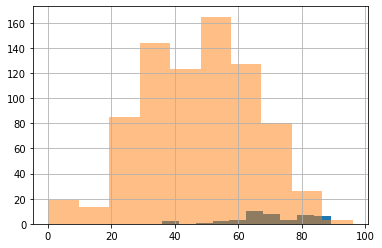

In [267]:
# Histogram of age distribution
did_not_survive['age'].hist()
survived_corona['age'].hist(alpha=0.5)
# Shows that survived were roughly normally distributed.
# Did not survive were skewed much older on average. 

In [268]:
china = cov19_cases[cov19_cases['country'] == 'China']
outside_china = cov19_cases[cov19_cases['country'] != 'China']

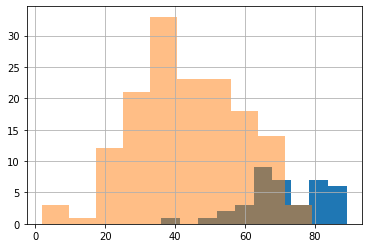

In [269]:
# outside_china.describe()
china.describe()
# Average age seems to be the same. 
did_not_survive[did_not_survive['country'] == 'China']['age'].hist()
survived_corona[survived_corona['country'] == 'China']['age'].hist(alpha=0.5)
# Shows clearly that anyone 80+ did not survive. 
# Shows that incidence is skewed to older population. 

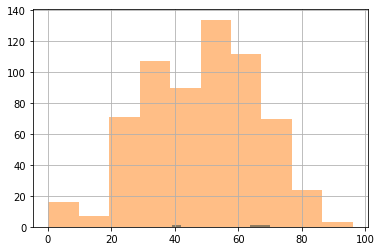

In [270]:
did_not_survive[did_not_survive['country'] != 'China']['age'].hist()
survived_corona[survived_corona['country'] != 'China']['age'].hist(alpha=0.5)
# Cases not in china are normally distributed, with negligible deaths. 

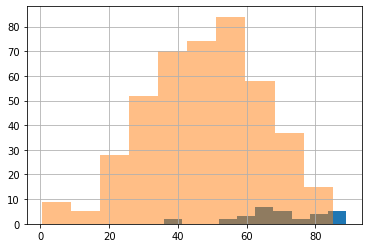

In [271]:
did_not_survive[did_not_survive['gender'] == 'male']['age'].hist()
survived_corona[survived_corona['gender'] == 'male']['age'].hist(alpha=0.5)

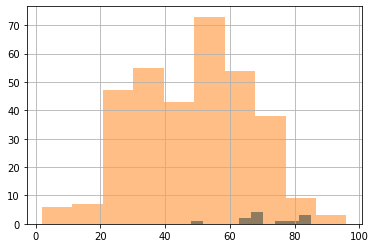

In [272]:
did_not_survive[did_not_survive['gender'] == 'female']['age'].hist()
survived_corona[survived_corona['gender'] == 'female']['age'].hist(alpha=0.5)

# Note: average ages are very similar for men and women. Survived ave age is 49. Died average age is 70.
# Seems like men were more likely to die than women

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


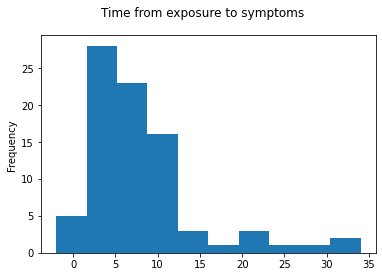

In [273]:
# calculate the time from exposure -> symptoms start
cov19_cases['exposure_start'] = pd.to_datetime(cov19_cases['exposure_start'])
cov19_cases['symptom_onset'] = pd.to_datetime(cov19_cases['symptom_onset'])
cov19_cases_symptoms = cov19_cases[pd.notnull(cov19_cases['exposure_start']) &  pd.notnull(cov19_cases['symptom_onset'])]
cov19_cases_symptoms['time_exposure_to_symptoms'] = (cov19_cases['symptom_onset'] - cov19_cases['exposure_start']).astype('timedelta64[D]')
symptom_onset_hist = cov19_cases_symptoms['time_exposure_to_symptoms'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Time from exposure to symptoms')
# Majority of cases showed symptoms within 14 days of inital exposure. May explain why 14 day isolaiton
# Period was chosen 

In [274]:
cov19_cases_symptoms['time_exposure_to_symptoms'].describe()

count    83.000000
mean      8.180723
std       6.786185
min      -2.000000
25%       4.000000
50%       6.000000
75%       9.000000
max      34.000000
Name: time_exposure_to_symptoms, dtype: float64

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [276]:
# Data cleanup
cov19_cases['age'].fillna(cov19_cases['age'].mean(), inplace=True)

# gender_to_binary = {'male': 0, 'female': 1}

# cov19_cases.gender = [gender_to_binary[item] for item in cov19_cases.gender]

# How to include gender even though it has nan
# How to make predictions on skewed data (i.e. not many died)

In [299]:
# X = cov19_cases[['age','cough_1','fever_1','something_else_1']]
X = cov19_cases[['fever_1']]
# X = cov19_cases[['cough_1']]
y = cov19_cases['death']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [300]:
train_x_y = X_train
train_x_y['death'] = y_train
train_died = train_x_y[train_x_y['death'] == '1']
train_x_y = pd.concat([train_x_y, train_died.sample(670, replace=True)])
len(train_x_y[train_x_y['death'] == '0'])
# X_train = train_x_y[['age','cough_1','fever_1','something_else_1']]
# X_train = train_x_y[['cough_1']]
X_train = train_x_y[['fever_1']]
y_train = train_x_y['death']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [301]:
# oversampling
len(y_train[y_train =='1'])
len(y_train[y_train =='0'])

691

In [302]:

# Ramdom state useful for reproducing your results

logistic_predictor = LogisticRegression(random_state=0).fit(X_train,y_train)
# decision_tree_predictor = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
# increasing max iterations let's it train for longer
print(logistic_predictor.coef_)
y_pred = logistic_predictor.predict(X_test)
# y_pred = decision_tree_predictor.predict(X_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

# 92.8% accuracy. Achieved mostly by making all predictions as dying

[[-1.5367324]]
              precision    recall  f1-score   support

           0       1.00      0.20      0.34       331
           1       0.07      1.00      0.14        21

    accuracy                           0.25       352
   macro avg       0.54      0.60      0.24       352
weighted avg       0.94      0.25      0.32       352

